### Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1303 Иванов Артур. Вариант №9.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введём обозначения:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи n<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)

### Бинарный метод $SX$

<ol>
<li>Запишем $n$ в двоичной СС:<center> $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, при этом $a_{m} = 1$</center></li>
<li>Отбрасываем старший бит</li>
<li>Преобразуем запись $n:$<center>$a_{i} = 1 \Rightarrow a_{i} = SX$<br>$a_{i} = 0 \Rightarrow a_{i} = S$</center></li>
<li>Далее вычисляем, начиная с $x$. Далее идём по преобразованной записи $n:$<center>$a_{i} = S \Rightarrow x = x ^ 2$<br>$a_{i} = X \Rightarrow x = x \cdot x$</center></li>
</ol>
Число операций для бинарного метода $SX$ можно записать следующим образом: $\lambda(n) + \nu(n) - 1$
    
### Бинарный метод возведения справа налево 
<ol>
    <li>На нулевой итерации $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - переходим на пункт 3, иначе - на пункт 4</li>
    <li>Перезаписываем $N = \lfloor N/2 \rfloor; Z = Z \cdot Z$; переходим на пункт 2</li>
    <li>Перезаписываем $N = \lfloor N/2 \rfloor; Y = Z \cdot Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и выходим из алгоритма. Иначе - перезаписываем $Z = Z \cdot Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево можно записать следующим образом: $\lambda(n) + \nu(n)$

### Метод множителей
<ol>
    <li>Представим $n$ в виде $n = p \cdot q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>При $n = 1$ - получим $x^n$</li>
</ol>

### Дерево степеней
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$. Это корень дерева</li>
    <li>$k+1$-й уровень строим по следующему принципу: берется каждый узел $i$ на $k$-м уровне слева направо и присоединяются узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>При этом, если узел уже появлялся - он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод SX
Реализуем функцию для бинарного метода SX:

In [81]:
def sxMethod(n):
    result = var('x')
    bin_n = str(bin(n))[3:]
    sx = bin_n.replace('1','SX').replace('0', 'S')
    show(sx)
    for i, el in enumerate(sx):
        if el == 'X':
            result *= x
        else:
            result ^= 2
        print(f"({i + 1}: {result})", end = ' ')
    return result

Приведём пример работы программы на нескольких $n$, а именно $34, 61, 15$: 

In [82]:
show(sxMethod(34))

'SSSSXS'

(1: x^2) (2: x^4) (3: x^8) (4: x^16) (5: x^17) (6: x^34) 

x^34

In [83]:
show(sxMethod(61))

'SXSXSXSSX'

(1: x^2) (2: x^3) (3: x^6) (4: x^7) (5: x^14) (6: x^15) (7: x^30) (8: x^60) (9: x^61) 

x^61

In [84]:
show(sxMethod(15))

'SXSXSX'

(1: x^2) (2: x^3) (3: x^6) (4: x^7) (5: x^14) (6: x^15) 

x^15

Теперь проверим оценку числа операций для данных $n$:<br>
$n = 34 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
$n = 61 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n) - 1 = 9 \Rightarrow$ Верно<br>
$n = 15 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
Таким образом, для введенных $n$ формула для вычисления количества операций корректна.
#### Вывод
Был реализован бинарный метод $SX$, была проверена корректность алгоритма и оценка числа операций из теоретического положения. Данный метод  быстрее возводит число в степень, если сравнивать при последовательном возведении. Также было замечено, что количество итераций увеличивается, при увеличении количества единиц в двоичной записи числа.

### 2. Метод возведения справа налево

Реализуем функцию для метода возведения справа налево:

In [85]:
!pip install prettytable
from prettytable import PrettyTable

def rightToLeft(power):
    counter = 0
    N = power
    Y = 1
    Z = var('x')
    table = PrettyTable(["Iteration", "N", "Y", "Z"])
    table.add_row([counter, N, Y, Z])
    while True:
        if N % 2 == 0:
            N = floor(N / 2)
            Z = Z * Z
        else:
            N = floor(N / 2)
            Y = Z * Y
            if (N == 0):
                counter += 1
                table.add_row([counter, N, Y, Z])
                break
            else:
                Z = Z * Z
        counter += 1
        table.add_row([counter, N, Y, Z])
    print(table)
    return Y

You should consider upgrading via the '/opt/sagemath-9.3/local/bin/python3 -m pip install --upgrade pip' command.


Приведём пример работы программы на нескольких $n$, а именно $34, 61, 15$. Для каждого $n$ выведем результат в виде таблицы.: 

In [86]:
show(rightToLeft(34))

+-----------+----+------+------+
| Iteration | N  |  Y   |  Z   |
+-----------+----+------+------+
|     0     | 34 |  1   |  x   |
|     1     | 17 |  1   | x^2  |
|     2     | 8  | x^2  | x^4  |
|     3     | 4  | x^2  | x^8  |
|     4     | 2  | x^2  | x^16 |
|     5     | 1  | x^2  | x^32 |
|     6     | 0  | x^34 | x^32 |
+-----------+----+------+------+


x^34

Конечный результат для n = 34:


| № итерации | Значение N |   Значение Y   | Значение Z |
|:----------:|:----------:|:--------------:|:----------:|
|      0     |     34     |        1       |      $x$     |
|      1     |     17     |        1       |    $x^2$   |
|      2     |      8     |      $x^2$     |     $x^4$    |
|      3     |      4     |      $x^2$     |     $x^8$    |
|      4     |      2     |      $x^2$     |    $x^{16}$    |
|      5     |      1     |      $x^2$     |    $x^{32}$    |
|      6     |      0     |    $x^{34}$    |    $x^{32}$    |

In [87]:
show(rightToLeft(61))

+-----------+----+------+------+
| Iteration | N  |  Y   |  Z   |
+-----------+----+------+------+
|     0     | 61 |  1   |  x   |
|     1     | 30 |  x   | x^2  |
|     2     | 15 |  x   | x^4  |
|     3     | 7  | x^5  | x^8  |
|     4     | 3  | x^13 | x^16 |
|     5     | 1  | x^29 | x^32 |
|     6     | 0  | x^61 | x^32 |
+-----------+----+------+------+


x^61

Конечный результат для n = 61:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     61     |      1     |     $x$    |
|      1     |     15     |     $x$    |    $x^2$    |
|      2     |     14     |     $x$    |    $x^4$   |
|      3     |      7     |    $x^5$   |    $x^8$   |
|      4     |      3     |  $x^{13}$  |  $x^{16}$  |
|      5     |      1     |  $x^{29}$  |  $x^{32}$  |
|      6     |      0     |  $x^{61}$  |  $ x^{32}$ |

In [88]:
show(rightToLeft(15))

+-----------+----+------+-----+
| Iteration | N  |  Y   |  Z  |
+-----------+----+------+-----+
|     0     | 15 |  1   |  x  |
|     1     | 7  |  x   | x^2 |
|     2     | 3  | x^3  | x^4 |
|     3     | 1  | x^7  | x^8 |
|     4     | 0  | x^15 | x^8 |
+-----------+----+------+-----+


x^15

Конечный результат для n = 15:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     15     |      1     |     $x$    |
|      1     |      7     |     $x$    |    $x^2$   |
|      2     |      3     |    $x^3$   |    $x^4$   |
|      3     |      1     |    $x^7$   |    $x^8$   |
|      4     |      0     |  $x^{15}$  |   $x^{8}$  |

### Теперь проверим оценку числа операций для данных $n$:<br>
$n = 34 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n)  = 7 \Rightarrow$ Верно<br>
$n = 61 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n)  = 10 \Rightarrow$ Верно<br>
$n = 15 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 4; \lambda(n) + \nu(n)  = 7 \Rightarrow$ Верно<br>
Таким образом, для наших $n$ формула для вычисления количества операций корректна.
#### Вывод
Был реализован бинарный метод возведения справа налево, была проверена корректность алгоритма и оценка числа операций из теоретического положения. Было замечено, что данный метод требует на одну операцию больше, по сравнению с $SX$. При этом вычислить число операций для данного метода можно по формуле $\lambda(n) + \nu(n)$

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Так как число операций в методе справа налево больше, чем в методе $SX$, то число итераций в методе справа налево можно оценить как $\lfloor log_{2}(n) \rfloor + 2$. В методе $SX$ же число итераций равно $\lambda(n) + \nu(n) - 1$.
$\Rightarrow$ бинарный метод $SX$ выгоднее, чем возведение справа налево.

### 4. Метод множителей

Выполним метод множителей вручную для $n= 34, n = 61, n = 15$ по алгоритму, приведённому в теоретическом положении.<br>

#### 1) n = 34:
$n = 17 \cdot 2$ <br>
$x^{34} = (x^{2})^{17}$<br>
$(x^{2})^{17} = x^{2} \cdot (x^{2})^{16}$<br>
$(x^{2})^{16} = ((x^{2})^{2})^{2})^{2})^2$ <br>
Рассчитаем нужные значения. <br>
$x^2 \rightarrow x, x^2$ (+1 операция) <br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция) <br>
$((x^2)^2)^2 \rightarrow (x^2)^2, ((x^2)^2)^2$ (+1 операция) <br>
$(((x^2)^2)^2)^2 \rightarrow ((x^2)^2)^2, (((x^2)^2)^2)^2$ (+1 операция) <br>
$((((x^2)^2)^2)^2)^2 \rightarrow (((x^2)^2)^2)^2, ((((x^2)^2)^2)^2)^2$ (+1 операция) <br>
$x^{34} = (x^2)^{17} \rightarrow (x^2)^{16}, (x^2)^{17}$ (+1 операция) <br>
Итого 6 операций. Из этого примера видно, что метод множителей может иметь столько же итераций, сколько и  метод $SX$ (в $SX$ для $n=34$ было также 6 операций).

2) n = 61 <br>
$x^{61} = x \cdot x^{60}$<br>
$x^{60} = (((x^{2})^2)^{3})^5$<br>
Рассчитаем нужные значения<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$(x^2)^2 \rightarrow (x^2), (x^2)^2$ (+1 операция)<br>
$((x^2)^2)^3 \rightarrow ((x^2)^2), ((x^2)^2)^2, ((x^2)^2)^3$ (+2 операции)<br>
$(((x^2)^2)^3)^5 \rightarrow (((x^2)^2)^3), (((x^2)^2)^3)^2, (((x^2)^2)^3)^4, (((x^2)^2)^3)^5$ (+3 операции)<br>
$x^{61}= x \cdot x^{60} \rightarrow x^{60}, x^{61}$ (+1 операция)<br>
Итого 8 операций.

3) n = 15 <br>
$n = 5 \cdot 3$<br>
$x^{15} = (x^3)^5$<br>
Рассчитаем нужные значения<br>
$x^3 \rightarrow x, x^2, x^3$ (2 операции)<br>
$(x^3)^5 \rightarrow x^3, (x^3)^2, (x^3)^4, (x^3)^5$ (+3 операции)<br>
Итого 5 операций. Из этого же примера видно, что метод множителей может быть и короче метода $SX$ (в $SX$ для $n = 15$ потребовалось 6 операций)


#### Вывод
Был рассмотрен метод множителей для нескольких $n$, было выявлено, что метод множителей в некоторых ситуациях может быть как быстрее (например для $n$ = 15), так и равной методу $SX$. Таким образом, можно сказать, что скорость выполнения напрямую зависит от конкретного значения $n$. В общих кондициях, алгоритм $SX$ является более предпочтительным, чем метод множителей, так как обладает более простой реализацией.

### 5. Построение дерева степеней

Реализуем алгоритм построения дерева степеней:

In [2]:
def createTree(k):
    tree = {1: [1]}
    node = [1]
    for _ in range(k):
        new_node = []
        for el in node:
            for parent in tree[el]:
                tmp = el + parent
                if tmp not in tree:
                    new_node.append(tmp)
                    tree[tmp] = tree[el] + [tmp]
        node = new_node
        
    tree[1] = []
    for el in tree:
        if len(tree[el] )> 1:
            tree[el] = [tree[el][-2]]
    return tree


tree = createTree(5)

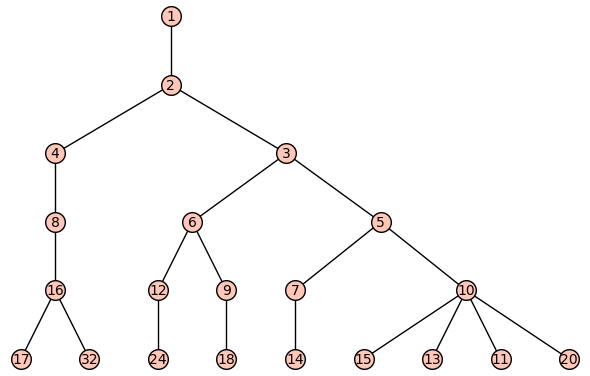

In [3]:
def printTree(tree):
    outputGraph = Graph(tree)
    P = outputGraph.plot(layout = 'tree', tree_root = 1)
    P.show()
    
printTree(tree)

Возьмем $n$ = 15. В данном случае получим последовательность из 5 итераций: $x$, $x^2$, $x^3$, $x^5$, $x^{10}$, $x^{15}$. Сравним теперь с остальными методами: метод $SX$ - 6, метод множителей - 5, метод справа налево - 7.

#### Вывод
Был реализован алгоритм дерева степеней. Было выявлено, что данный метод не медленнее метода $SX$ и метода множителей.

## Выводы

Сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций, привит навык использования системы компьютерной алгебры *SageMath* для реализации алгоритмов.<br>
Был реализован бинарный метод $SX$, бинарный метод возведения в степень справа налево, рассмотрен метод множителей и реализован алгоритм дерева степеней. Также была оценена теоретически и практически сложность алгоритмов.